In [1]:
import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np
import Phys
# physical constants in cgs units
constants = Phys.ReadPhys()
import importlib
from SpecWizard_Input import ReadData

import SpecWizard_BuildInput
SpecWizard_BuildInput = importlib.reload(SpecWizard_BuildInput)
from SpecWizard_BuildInput import Build_Input

import SpecWizard_ProjectData
SpecWizard_ProjectData = importlib.reload(SpecWizard_ProjectData)
from SpecWizard_ProjectData import SightLineProjection

import SpecWizard_ComputeOpticaldepth
SpecWizard_ComputeOpticaldepth = importlib.reload(SpecWizard_ComputeOpticaldepth)
from SpecWizard_ComputeOpticaldepth import ComputeOpticaldepth
from SpecWizard_Atomfile import Atomfile

This class defines the B-spline kernel of Monaghan and Lattanzio, as used in Gadget-2


In [2]:
BI     = Build_Input()
Wizard = BI.read_from_yml("Wizard.yml")

In [3]:
snapshot  = ReadData(wizard = Wizard)
particles = snapshot.read_particles()  

sightlineprojection  = SightLineProjection(Wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)


Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
this is happening
Warning! Not able to read Star formation Rate properties...setting SFR to zero!


In [4]:
particles['Particles']['SimulationIonFractions']

{'H I': {'Value': array([4.2340539e-06, 4.0375362e-06, 3.8012643e-06, ..., 1.4159757e-05,
         8.0423415e-06, 1.0183944e-05], dtype=float32),
  'Info': {'VarDescription': b'HI gas fraction, dimensionless, nHI/nH_total[ - ] ',
   'CGSConversionFactor': 1.0,
   'h-scale-exponent': 0.0,
   'aexp-scale-exponent': 0.0}}}

In [5]:
cspec          = ComputeOpticaldepth(Wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)


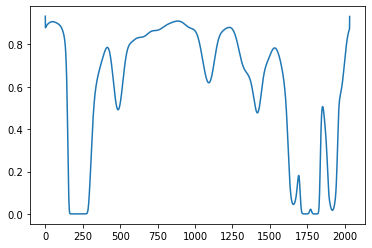

In [6]:
plt.plot(np.exp(-opticaldepth['SimIons'][('Hydrogen', 'H I')]['Optical depths']['Value']))